In [1]:
import pandas as pd
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BA5.csv')
data.head()

,DateTime,Hole Depth,Bit Depth,True Vertical Depth,MudWatcher Temperature (Degrees F),MudAid Temperature (Degrees F),ES Meter Temperature (Degrees F),Mud Density,Mud Watcher Density (lb/gal),MudWatcher Viscosity,...,Hook Load,Standpipe Pressure,Rate Of Penetration,Rotary RPM,Rotary Torque,Azimuth,Inclination,In Slip,Differential Pressure,Rate Of Penetration.1
0,11/20/2020 0:51:10,106.0,8.9,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.0,146.25,0.0,0.0,0.226,16.51,1.0,0,42.89,0.0
1,11/20/2020 0:51:20,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.0,147.50,0.0,0.0,0.226,16.51,1.0,0,48.28,0.0
2,11/20/2020 0:51:30,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.1,152.50,0.0,0.0,0.226,16.51,1.0,0,59.68,0.0
3,11/20/2020 0:51:40,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.0,170.00,0.0,0.0,0.226,16.51,1.0,0,69.43,0.0
4,11/20/2020 0:51:50,106.0,100.0,-999.25,0.0,134.6,138.5,8.7,5.17,0.0,...,57.1,168.75,0.0,0.0,0.226,16.51,1.0,0,74.93,0.0


# Predicting mud properties from system parameters

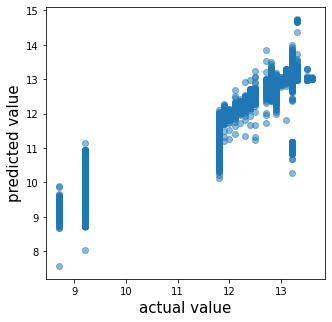

In [8]:
# linear regression doesnt seem to be a good model for this data
# magnitudes are not shown in this study

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',], axis = 1)

Y = data[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o', alpha = 0.5)
# plt.ylim(-10,150)
# plt.xlim(-10,150)
# plt.title('Mud Density', fontsize = 15)
plt.xlabel('actual value', fontsize = 15)
plt.ylabel('predicted value', fontsize = 15)
plt.show()

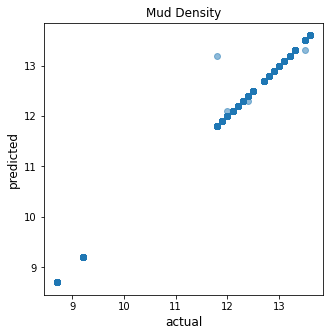

In [9]:
from sklearn.tree import DecisionTreeRegressor


X = data.drop(['DateTime','True Vertical Depth','MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)',
       'ES Meter Temperature (Degrees F)', 'Mud Density',
       'Mud Watcher Density (lb/gal)', 'MudWatcher Viscosity',
       'ES Meter Voltage', 'MudAid Viscosity @ 600RPM (D.R.)',
       'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 200RPM (D.R.)',
       'MudAid Viscosity @ 100RPM (D.R.)', 'MudAid Viscosity @ 6RPM (D.R.)',
       'MudAid Viscosity @ 3RPM (D.R.)', 'PV (API)', 'MudAid PV Value',
       'YP (API)', 'MudAid YP Value (100lb/ft2)', 'LSYP (API)',
       'MudAid LSYP (100lb/ft2)',], axis = 1)

Y = data[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o', alpha = 0.5)
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Mud Density', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.savefig('example_ Mud Density all magnitudes.png', dpi = 500)
plt.show()

# Predicting MudWatcher Temperature (Degrees F)


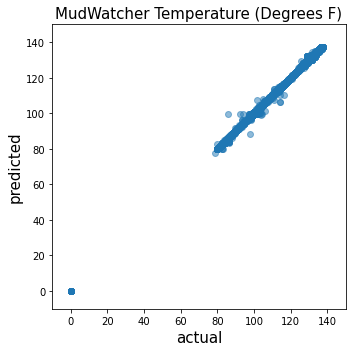

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X = data.drop(['DateTime','True Vertical Depth', 'MudWatcher Temperature (Degrees F)', 
               'MudAid Temperature (Degrees F)', 'ES Meter Temperature (Degrees F)'], axis = 1)

Y = data[['MudWatcher Temperature (Degrees F)']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o', alpha = 0.5)
plt.ylim(-10,150)
plt.xlim(-10,150)
plt.title('MudWatcher Temperature (Degrees F)', fontsize = 15)
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predicted', fontsize = 15)
plt.tight_layout()
plt.savefig('example_ MudWatcher Temperature all magnitudes.png', dpi = 500)
plt.show()

In [12]:
table = pd.DataFrame()
table['parameter'] = X.columns
table['relevance'] = model.feature_importances_
t1 = table.sort_values(by = 'relevance', ascending = False).parameter[:10]
list(np.array(t1))

['MudWatcher Viscosity',
 'MudAid Viscosity @ 100RPM (D.R.)',
 'Hole Depth',
 'Bit Depth',
 'Mud Density',
 'MudAid Viscosity @ 200RPM (D.R.)',
 'MudAid Viscosity @ 6RPM (D.R.)',
 'ES Meter Voltage',
 'MudAid LSYP (100lb/ft2)',
 'MudAid PV Value']

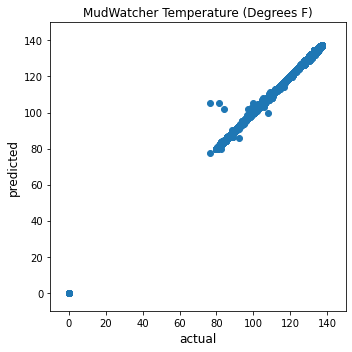

In [60]:
X = data[np.array(t1)]

Y = data[['MudWatcher Temperature (Degrees F)']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeRegressor(max_depth=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
plt.ylim(-10,150)
plt.xlim(-10,150)
plt.title('MudWatcher Temperature (Degrees F)', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ MudWatcher Temperature.png', dpi = 500)
plt.show()